<a id="ref1"></a>

<h1>Linear Regression</h1>

Linear regression is a method to approximate the relationship between variables. In a simple linear regression, there's a dependent variable (what we're trying to predict) and one or more independent variables (factors influencing the dependent variable). It's like finding a straight line that best fits the data points, helping us understand how changes in the independent variables relate to changes in the dependent variable.

In the linear regression equation \($Y = a X + b $\), \(Y\) represents the dependent variable, \(X\) is the independent variable, and \(a\) and \(b\) are parameters we adjust. \(a\) is commonly referred to as the "slope" or "gradient," while \(b\) is the "intercept." This equation can be interpreted as \(Y\) being a function of \(X\), or more simply, \(Y\) depends on \(X\).



In [1]:
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

We will use a sample dataset, and then we'll use TensorFlow to adjust and get the right parameters. We download a dataset that is related to medical cost personal.
Dataset Link: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [2]:
data = pd.read_csv(glob.glob("*.csv")[0])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We want to use linear regression to predict charges of persons based on their bmi factor. Lets define X and Y value for the linear regression, that is, train_x and train_y:

In [3]:
train_x = data['bmi'].values
original_y = data['charges'].values # keep for later plotting
train_y = original_y.copy()

The values of charges first need to be normalized before proceeding:

In [4]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.reshape(-1, 1))

Define the model:

In [5]:
def model(x):
    y = a * x + b
    return y

Define the loss function for regression, which is Mean Square Error (MSE) between actual and predicted values.

In [6]:
def loss_function(y, predicted_y):
    mse = tf.reduce_mean(tf.square(y - predicted_y))
    return mse

We initialize the variables <b>a</b> and <b>b</b>, with random values, later the model will learn the suitable values:


In [7]:
a = tf.Variable(0.001, dtype=tf.float32)
b = tf.Variable(0.001, dtype=tf.float32)

We are ready to start training. We use GradientTape to calculate gradients:

In [8]:
learning_rate = 0.0001
total_epochs = 30
loss_history = []
a_values = []
b_values = []

for epoch in range(1, total_epochs + 1):
    with tf.GradientTape() as tape:
        predicted_y = model(train_x)
        loss = loss_function(train_y, predicted_y)
        loss_history.append(loss)
        
        # Get gradients
        gradient = tape.gradient(loss, [a, b])
        
        a_values.append(a.numpy())
        b_values.append(b.numpy())
        
        a.assign_sub(gradient[0] * learning_rate)
        b.assign_sub(gradient[1] * learning_rate)
        
        if epoch % 10 == 0:
            print(f"Epoch[{epoch}], Loss: {loss:.3f}")

Epoch[10], Loss: 0.039
Epoch[20], Loss: 0.039
Epoch[30], Loss: 0.039


Lets plot the loss values to see how it has changed during the training:

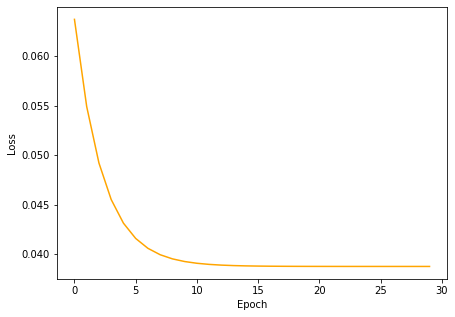

In [9]:
plt.figure(figsize=(7, 5))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_history, 'orange')
plt.show()

When you plot the linear regression model, it appears as a straight line. Adjusting the slope parameter changes the angle between this line and the independent variable axis while adjusting the intercept parameter shifts where the line crosses the dependent variable's axis.

The following plot demonstrates how the coefficient and intercept of the line have changed to fit the data. The green dots are the data points, the blue lines are changes based on the a and b coefficients during training, and the orange line is the final line predicted by the model that shows the relationship between the dependent (Charges) and independent (BMI) variables.

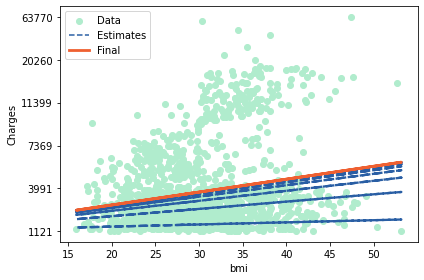

In [10]:
plt.scatter(train_x, train_y, color='#B0ECCD', label='Data')

step = 3
for i, (a,b) in enumerate((zip(a_values[::step], b_values[::step]))):
    plt.plot(train_x, a * train_x + b, color='#295EA4', linewidth=2.3, linestyle='dashed')
plt.plot([], [], color='#295EA4', linestyle='dashed', label='Estimates') # for drawing legends
    
plt.plot(train_x, a_values[-1] * train_x + b_values[-1], color='#EF6031', linewidth=2.8, label='Final')
plt.xlabel("bmi")
plt.ylabel('Charges')

quantiles = np.quantile(original_y, [0, 0.2, 0.4, 0.6, 0.8, 1]).astype(int).astype(str)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], quantiles) # Set custom y-axis tick labels (original values intead of normalized values)
plt.legend()

plt.savefig('./plot.png', format='png', dpi=600, bbox_inches='tight')
plt.tight_layout()

plt.show()